Last update: May 25th, 2024 

# Oblique QLT 

##### [V. Roytershteyn and G. L. Delzanno. *Nonlinear coupling of whistler waves to oblique electrostatic turbulence enabled by cold plasma*. Physics of Plasmas, 28(4):042903, 04 2021](https://pubs.aip.org/aip/pop/article-abstract/28/4/042903/263604/Nonlinear-coupling-of-whistler-waves-to-oblique?redirectedFrom=fulltext)

Author: Opal Issan (oissan@ucsd.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy
from scipy.sparse import diags
from QLT_equations.obliqueQLT import dispersion_relation, dKperpdt, dTperpdt, dKpardt, dTpardt, dBdt, dEdt, dVdt

In [2]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

### Oblique electrostatic waves
The dispersion relation is 
\begin{equation*}
    k_{\perp}^2 + k_{\|}^2 + \frac{2n_{c}\omega_{pe}^2}{\alpha_{\| c}^2} \left[ 1 +   \sum_{n=-\infty}^{\infty} \exp(-\lambda_{c}) I_{n}(\lambda_{c}) Z(\xi_{c}^{n}) \left[\xi_{c}^{0} +  \frac{n \Omega_{ce}}{k_{\|} \alpha_{\| c}} \left[ 1-\frac{T_{\| c}}{T_{\perp c}} \right]\right]\right] = \frac{\omega_{pi}^2}{\alpha_{i}^2} \left|J_{1}\left(\frac{k_{\perp} |V_{Dc}|}{\omega_{0}}\right)\right|^2 Z'\left(\frac{\omega -\omega_{0}}{k \alpha_{i}}\right).
\end{equation*}
\begin{align*}
    k &\coloneqq \|\vec{k}\|_{2} = \sqrt{k_{\perp}^2 + k_{\|}^2}\\
    \lambda_{c} &\coloneqq \frac{k_{\perp}^2 \alpha_{\|c}^2}{2} \\
    \xi_{c}^{n} &\coloneqq \frac{\omega - n}{k_{\|} \alpha_{\|c}}
\end{align*} 

In [3]:
# parameters from 2021 paper 
# normalization (vadim parameters)
# time is normalized to the electron cyclotron frequency 1/Omega_ce
# space is normalized to electron inertial length d_e
omega_0 = 0.5 # Omega_ce
omega_pe = 4 # Omgea_{ce}

n_c = 4/5 # n^e_0

# thermal velocity 
alpha_c_par = 0.0079 # d_e x Omega_ce
alpha_c_perp = 0.0079 # d_e x Omega_ce
alpha_i =  alpha_c_par / np.sqrt(1836) # d_e x Omega_ce

v_0 = 0.65 * alpha_c_par # d_e x Omega_ce
omega_pi = omega_pe / np.sqrt(1836) # Omega_ce

# initial conditions
E0 = 1e-9
K_perp_0 = (alpha_c_perp**2 / 2) * n_c
K_par_0 = (alpha_c_perp**2 / 2) * n_c
T_perp_0 = (alpha_c_perp**2 / 2) 
T_par_0 = (alpha_c_par**2 / 2) 
k_0 = 1 # d_e
dB0 = 4*np.pi * (5e-5) # d_{e}^3 Omega_{ce}^2 m_{e} n_{e}

# max time 
t_max = 300

In [4]:
k_perp = 6
k_par = k_perp *np.sqrt((omega_0**2)/ (1-omega_0**2))
print("k = ", np.sqrt(k_perp**2 + k_par**2))

k =  6.928203230275509


In [5]:
sol = scipy.optimize.newton(dispersion_relation(k_perp=k_perp, k_par=k_par, 
                                                omega_pe=omega_pe, omega_pi=omega_pi, omega_0=omega_0, v_0=v_0, 
                                                alpha_i=alpha_i, alpha_c_par=alpha_c_par, alpha_c_perp=alpha_c_perp, n_c=n_c),
                            omega_0+1e-3j, tol=1e-15)

print("omega_k + i gamma = ", sol)
print("dispersion residual = ", abs(dispersion_relation(k_perp=k_perp, k_par=k_par, 
                                                omega_pe=omega_pe, omega_pi=omega_pi, omega_0=omega_0, v_0=v_0, alpha_c_perp=alpha_c_perp,
                                                alpha_i=alpha_i, alpha_c_par=alpha_c_par, n_c=n_c)(sol)))

omega_k + i gamma =  (0.4871818311382932+4.4011625265040416e-18j)
dispersion residual =  5.055378518071675e-11


In [6]:
k_perp_ = np.linspace(5, 60, 120)
k_par_ = np.sqrt((omega_0**2) / (1-omega_0**2))*k_perp_
sol_ = np.zeros((len(k_perp_)), dtype="complex128")
k_abs = np.zeros((len(k_perp_)))

In [7]:
dk_perp = np.abs(k_perp_[1] - k_perp_[0])
dk_par = np.abs(k_par_[1] - k_par_[0])

In [8]:
for ii in range(len(k_perp_)):
    try:
        k_abs[ii] = np.sqrt(k_par_[ii]**2 + k_perp_[ii]**2)
        sol_[ii] = scipy.optimize.newton(dispersion_relation(k_perp=k_perp_[ii], k_par=k_par_[ii], 
                                                omega_pe=omega_pe, omega_pi=omega_pi, omega_0=omega_0, v_0=v_0, alpha_c_perp=alpha_c_perp,
                                                alpha_i=alpha_i, alpha_c_par=alpha_c_par, n_c=n_c), omega_0*0.99 + 1e-3j, tol=1e-15)
    except:
        sol_[ii] =  np.inf + np.inf*1j
        print("An exception occurred")

An exception occurred


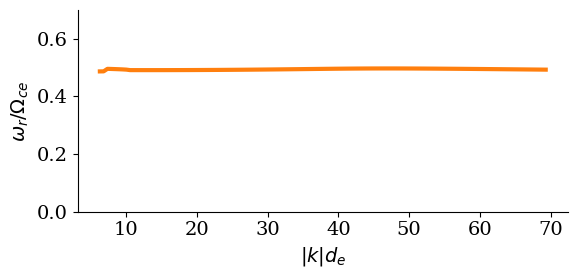

In [9]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(k_abs, sol_.real, linewidth=3, color="tab:orange")
ax.set_ylabel('$\omega_r/\Omega_{ce}$')
ax.set_xlabel('$|k|d_{e}$')
ax.set_ylim(0, 0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("figs/vadim_2021/vadim_fig5_c.png", dpi=300, bbox_inches='tight')

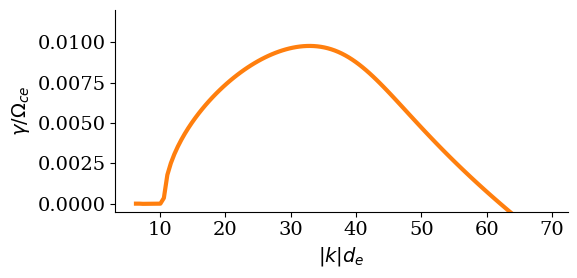

In [10]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(k_abs, sol_.imag, color="tab:orange", linewidth=3)
ax.set_ylabel('$\gamma/\Omega_{ce}$', rotation=90)
ax.set_xlabel('$|k|d_{e}$')
ax.set_ylim(-0.0005, 0.012)
#ax.set_xticks([180, 200, 220, 240])
#ax.set_yticks([0, 0.0025, 0.005, 0.0075])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("figs/vadim_2021/vadim_fig5_d.png", dpi=300, bbox_inches='tight')

# QLT equations
\begin{align*}
    \frac{\mathrm{d} K_{\perp c}}{\mathrm{d} t} &= \frac{n_{c}}{2\pi}  \frac{\omega_{pe}^2}{\alpha_{\| c}^2} \int \mathrm{d} \vec{k} \frac{\mathcal{E}_{E}(\vec{k}, t)}{|\vec{k}|^2} \mathrm{Im}\left\{\sum_{n=-\infty}^{\infty} n \exp(-\lambda_{c})  I_{n}(\lambda_{c}) \left[\xi_{c}^{0} + \frac{n}{k_{\|} \alpha_{\| c} } \left[\frac{\alpha_{\| c}^2}{\alpha_{\perp c}^2} - 1\right] \right] Z(\xi_{c}^{n})\right\}\\
    \frac{\mathrm{d} K_{\| c}}{\mathrm{d} t} &=\frac{n_{c}}{\pi}  \frac{\omega_{pe}^2}{\alpha_{\| c}^2} \int \mathrm{d} \vec{k} \frac{\mathcal{E}_{E}(\vec{k}, t)}{|\vec{k}|^2}\mathrm{Im} \left\{\omega +  \sum_{n=-\infty}^{\infty} \exp(-\lambda_{c}) I_{n}(\lambda_{c}) \left\{\omega  + n \left[\frac{\alpha_{\| c}^2}{\alpha_{\perp c}^2} - 1\right]   \right] \xi_{c}^{n}Z(\xi_{c}^{n}) \right\}\\
    \frac{\mathrm{d} T_{\perp c}}{\mathrm{d} t} &= \frac{\omega_{pe}^2}{ 2\sqrt{\pi} \alpha_{\| c}^2} \int \mathrm{d} \vec{k} \frac{\mathcal{E}_{E}(\vec{k}, t)}{|\vec{k}|^2}   \sum_{n=-\infty}^{\infty} n \exp(-\lambda_{c}) I_{n}(\lambda_{c})\left[\mathrm{Re}\{\xi_{c}^{0}\} + \frac{n}{k_{\|} \alpha_{\| c}} \left[\frac{\alpha_{\| c}^2}{\alpha_{\perp c}^2} -1 \right] \right] \exp\left(-\mathrm{Re}\{\xi_{c}^{n}\}^2 \right) \\
    \frac{\mathrm{d} T_{\| c}}{\mathrm{d} t} &= \frac{\omega_{pe}^2}{\sqrt{\pi} \alpha_{\| c}^2} \int \mathrm{d} \vec{k} \frac{\mathcal{E}_{E}(\vec{k}, t)}{|\vec{k}|^2} \sum_{n=-\infty}^{\infty} \exp(-\lambda_{c}) I_{n}(\lambda_{c}) \left[ \mathrm{Re}\{\omega\} + n \left[\frac{\alpha_{\| c}^2 }{\alpha_{\perp c}^2 } -1\right] \right] \mathrm{Re}\{\xi_{c}^{n}\} \exp\left(-\mathrm{Re}\{\xi_{c}^{n}\}^2 \right) \\
    \partial_{t} \mathcal{E}_{E}(k_{\perp}, t)  &= 2 \mathrm{Im}\{\omega\}  \mathcal{E}_{E}(\vec{k}, t) \\
    \partial_{t} \int_{0}^{\infty} \mathrm{d} k_{\|}  \mathcal{E}_{B}(k_{\|}, t) &= \frac{4\pi}{\frac{\omega_{0}^2}{k_{\|0}^2 \omega_{pe}^2} + 1} \left[ -\frac{\mathrm{d} K_{\perp c}}{\mathrm{d} t} - \frac{\mathrm{d} K_{\| c}}{\mathrm{d} t} - \frac{1}{\pi} \int_{0}^{\infty} \int_{0}^{\infty} \mathrm{d} k_{\perp} \mathrm{d} k_{\|}\mathrm{Im} \{ \omega\} \mathcal{E}_{E}(\vec{k}, t) \right]\\
    \frac{\mathrm{d} |V_{Dc}(t)|^2}{\mathrm{d} t} &= \frac{1}{4\pi} \left[\frac{\omega_{0}}{k_{\|0}}\frac{1}{\omega_{0} -1} \right]^2 \partial_{t} \int_{0}^{\infty} \mathrm{d} k_{\|}  \mathcal{E}_{B}(k_{\|}, t)\\
    |\vec{k}|^2 + 2 n_{c} \frac{\omega_{pe}^2}{\alpha_{\| c}^2} &\left[ 1 +   \sum_{n=-\infty}^{\infty} \exp(-\lambda_{c}) I_{n}(\lambda_{c}) Z(\xi_{c}^{n}) \left[\xi_{c}^{0} + \frac{n}{k_{\|} \alpha_{\| c}} \left[\frac{\alpha_{\| c}^2}{\alpha_{\perp c}^2} -1\right]\right]\right] = \frac{\omega_{pi}^2}{\alpha_{i}^2} \left|J_{1}\left(\frac{k_{\perp} |V_{Dc}|}{\omega_{0}}\right)\right|^2 Z'\left(\frac{\omega -\omega_{0}}{k \alpha_{i}}\right)\\
    \lambda_{c} &\coloneqq \frac{k_{\perp}^2 \alpha_{\perp c}^2}{2} \\
    \xi_{c}^{n} &\coloneqq \frac{\omega - n}{k_{\|} \alpha_{c\|}}
\end{align*}


In [11]:
def get_omega_vec(k_perp, k_par, omega_pe, omega_pi, v_0, alpha_i, alpha_c_perp, alpha_c_par, n_c, omega_0):
    omega_vec = np.zeros(len(k_perp), dtype="complex128")
    for ii, kk in enumerate(k_perp):
        try:
            omega_vec[ii] = scipy.optimize.newton(dispersion_relation(k_perp=k_perp[ii], k_par=k_par[ii], 
                                                omega_pe=omega_pe, omega_pi=omega_pi, omega_0=omega_0, v_0=v_0, alpha_c_perp=alpha_c_perp,
                                                alpha_i=alpha_i, alpha_c_par=alpha_c_par, n_c=n_c), omega_0*0.99 + 1e-3j, tol=1e-15)
        except:
            print("dispersion relation failed to converge")
            print("k||", str(k_par[ii]))
            print("k|_", str(k_perp[ii]))
    return omega_vec

In [12]:
def dydt(t, f, k_perp, k_par, omega_pe, omega_pi, k_0, alpha_i, n_c, dk_perp, dk_par, omega_0):
    # dispersion solver
    omega_vec = get_omega_vec(k_perp=k_perp,  k_par=k_par, omega_pe=omega_pe, omega_pi=omega_pi, v_0=v_0, 
                              alpha_i=alpha_i, alpha_c_perp=np.sqrt(2 * f[2]), alpha_c_par=np.sqrt(2 * f[3]), n_c=n_c, omega_0=omega_0)
    
    # cold electron kinetic energy 
    rhs_K_perp = dKperpdt(E_vec=f[6:], omega_pe=omega_pe, alpha_c_par=np.sqrt(2 * f[3]), 
                          alpha_c_perp=np.sqrt(2 * f[2]), n_c=n_c, k_par=k_par, k_perp=k_perp, omega_vec=omega_vec, dk_perp=dk_perp, dk_par=dk_par)

    rhs_K_par = dKpardt(E_vec=f[6:], omega_pe=omega_pe, alpha_c_par=np.sqrt(2 * f[3]), alpha_c_perp=np.sqrt(2 * f[2]),
                        n_c=n_c, k_par=k_par, k_perp=k_perp, omega_vec=omega_vec, dk_perp=dk_perp, dk_par=dk_par)

    # cold electron temperature 
    rhs_T_perp = dTperpdt(E_vec=f[6:], omega_pe=omega_pe, alpha_c_par=np.sqrt(2 * f[3]), alpha_c_perp=np.sqrt(2 * f[2]), 
                          k_par=k_par, k_perp=k_perp, omega_vec=omega_vec, dk_perp=dk_perp, dk_par=dk_par)

    rhs_T_par = dTpardt(E_vec=f[6:], omega_pe=omega_pe, alpha_c_par=np.sqrt(2 * f[3]), alpha_c_perp=np.sqrt(2 * f[2]), 
                        k_par=k_par, k_perp=k_perp, omega_vec=omega_vec, dk_perp=dk_perp, dk_par=dk_par)

    # magnetic energy whistler
    rhs_B = dBdt(omega_0=omega_0, k_0=k_0, E_vec=f[6:], omega_pe=omega_pe, alpha_c_par=np.sqrt(2 * f[3]), alpha_c_perp=np.sqrt(2 * f[2]), 
                 n_c=n_c, k_par=k_par, k_perp=k_perp, omega_vec=omega_vec, dk_perp=dk_perp, dk_par=dk_par)

    # drift magnitude of cold electrons
    rhs_V =dVdt(omega_0=omega_0, k_0=k_0, E_vec=f[6:], omega_pe=omega_pe, alpha_c_par=np.sqrt(2 * f[3]), 
                alpha_c_perp=np.sqrt(2 * f[2]), n_c=n_c, k_par=k_par, k_perp=k_perp, omega_vec=omega_vec, dk_perp=dk_perp, dk_par=dk_par)

    # electrostatic electric energy
    rhs_E = dEdt(gamma=omega_vec.imag, E_vec=f[6:])

    print("t = ", t)
    print("max gamma = ", np.max(omega_vec.imag))
    return np.concatenate(([rhs_K_perp], [rhs_K_par], [rhs_T_perp], [rhs_T_par], [rhs_B], [rhs_V], rhs_E))

In [ ]:
dE_init = E0 * np.ones(len(k_perp_))

# simulate 
result = scipy.integrate.solve_ivp(fun=dydt, t_span=[0, t_max], 
                                   y0=np.concatenate(([K_perp_0], [K_par_0], [T_perp_0], [T_par_0], [dB0], [v_0**2], dE_init)), 
                                   args=(k_perp_, k_par_, omega_pe, omega_pi, k_0, alpha_i, n_c, dk_perp, dk_par, omega_0),
                                   atol=1e-5, rtol=1e-5, 
                                   method='BDF')

dispersion relation failed to converge
k|| 2.8867513459481287
k|_ 5.0
t =  0.0
max gamma =  0.00977289230695204
dispersion relation failed to converge
k|| 2.8867513459481287
k|_ 5.0
dispersion relation failed to converge
k|| 3.153593907338292
k|_ 5.46218487394958
t =  221.1032704052728
max gamma =  0.009727183810933768
dispersion relation failed to converge
k|| 2.8867513459481287
k|_ 5.0
t =  0.0
max gamma =  0.00977289230695204
dispersion relation failed to converge
k|| 2.8867513459481287
k|_ 5.0
t =  0.0
max gamma =  0.00977289230695204
dispersion relation failed to converge
k|| 2.8867513459481287
k|_ 5.0
t =  0.0
max gamma =  0.00977289230695204
dispersion relation failed to converge
k|| 2.8867513459481287
k|_ 5.0
dispersion relation failed to converge
k|| 10.892028187653024
k|_ 18.865546218487395
dispersion relation failed to converge
k|| 11.959398433213677
k|_ 20.714285714285715
t =  0.0
max gamma =  0.009772892307241154
dispersion relation failed to converge
k|| 2.886751345948128